<a href="https://colab.research.google.com/github/moimigueldev/tensorflow-ztm/blob/main/mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mushroom Binary Classification with Deep Learning

[Kaggle Original Notebook](https://www.kaggle.com/datasets/uciml/mushroom-classification)


### Classify Mushrooms as poisonous (p) or Edible (e)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


# Explore data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/deep-learning/mushroom-classification/mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [3]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# Preprocess

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
# One-hot encode data
df_1 = pd.get_dummies(df.drop(['class'], axis=1))
df_1

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


In [8]:
X = df_1.to_numpy()
y = pd.get_dummies(df['class'], drop_first=True).to_numpy().squeeze()




In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((6499, 117), (1625, 117))

# Models

Epoch 1/4
204/204 [==============================] - 1s 2ms/step - loss: 0.3945 - accuracy: 0.8334 - val_loss: 0.2622 - val_accuracy: 0.8905
Epoch 2/4
204/204 [==============================] - 0s 2ms/step - loss: 0.2002 - accuracy: 0.9235 - val_loss: 0.1659 - val_accuracy: 0.9477
Epoch 3/4
204/204 [==============================] - 0s 2ms/step - loss: 0.1340 - accuracy: 0.9632 - val_loss: 0.1184 - val_accuracy: 0.9674
Epoch 4/4
204/204 [==============================] - 0s 2ms/step - loss: 0.0990 - accuracy: 0.9768 - val_loss: 0.0912 - val_accuracy: 0.9772


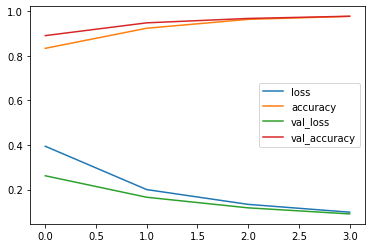

In [15]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(2, activation='softmax')
])

model_1.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(), metrics=['accuracy'])


history_1 = model_1.fit(X_train, y_train, epochs=4, validation_data=(X_test, y_test))
pd.DataFrame(history_1.history).plot()

In [11]:
# Evaluation for model 1
from sklearn.metrics import confusion_matrix

y_pred = model_1.predict(X_test)

confusion_matrix(y_test, y_pred.argmax(axis=-1))

array([[836,   7],
       [  1, 781]])

The model performed well for the, let's try to add some hidden layers to improve the model

Epoch 1/2
204/204 [==============================] - 1s 4ms/step - loss: 0.0460 - accuracy: 0.9854 - val_loss: 0.0014 - val_accuracy: 1.0000
Epoch 2/2
204/204 [==============================] - 1s 3ms/step - loss: 8.5319e-04 - accuracy: 1.0000 - val_loss: 4.3284e-04 - val_accuracy: 1.0000


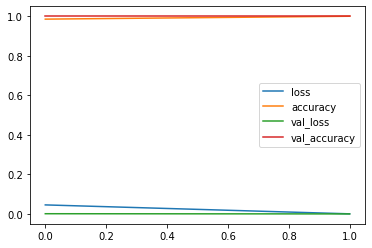

In [20]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(4, activation='relu'),
                               tf.keras.layers.Dense(2, activation='softmax')
])

model_2.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(), optimizer = tf.keras.optimizers.Adam(learning_rate=0.1), metrics=['accuracy'])


history_2 = model_2.fit(X_train, y_train, epochs=2, validation_data=(X_test, y_test))
pd.DataFrame(history_2.history).plot()

In [21]:
# Evaluation for model 2
y_pred = model_2.predict(X_test)
confusion_matrix(y_test, y_pred.argmax(axis=-1))

array([[843,   0],
       [  0, 782]])

# Summary

* `model_2` performed best. We have `100%` accuracy on both test and validation data

* The confusion matrix shows all of the predictions fall on `tp` and `tn`